In [39]:
import pandas as pd

input_path = 'dataset/pciat_clustered.csv'
input_csv = pd.read_csv(input_path)

train = input_csv.drop(columns='sii')
y = input_csv['sii']


def map_severity(value):
    if 0 <= value <= 30:
        return 0  # None
    elif 31 <= value <= 49:
        return 1  # Mild
    elif 50 <= value <= 79:
        return 2  # Moderate
    elif 80 <= value <= 100:
        return 3  # Severe
    else:
        return -1  # Valore fuori intervallo


# Applicazione della funzione alla colonna
y = y.apply(map_severity)

train.shape, y.shape

KeyError: "['sii'] not found in axis"

In [36]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.30, random_state=42)

for max_leaves in range(2, 200):
    # train and predict
    dt = DecisionTreeClassifier(max_leaf_nodes=max_leaves)
    dt.fit(X_train,y_train)

    # compute Accuracy
    train_acc = accuracy_score(y_true = y_train, y_pred = dt.predict(X_train))
    test_acc  = accuracy_score(y_true = y_test,  y_pred = dt.predict(X_test))
    print ("Max leaves: {:d} Train Accuracy: {:.3f} - Test Accuracy: {:.3f}".format(max_leaves, train_acc,test_acc) )

#model_decision_boundary(dt, X_test, y_test)

Max leaves: 2 Train Accuracy: 0.678 - Test Accuracy: 0.724
Max leaves: 3 Train Accuracy: 0.678 - Test Accuracy: 0.724
Max leaves: 4 Train Accuracy: 0.912 - Test Accuracy: 0.928
Max leaves: 5 Train Accuracy: 0.912 - Test Accuracy: 0.928
Max leaves: 6 Train Accuracy: 0.914 - Test Accuracy: 0.921
Max leaves: 7 Train Accuracy: 0.916 - Test Accuracy: 0.921
Max leaves: 8 Train Accuracy: 0.916 - Test Accuracy: 0.921
Max leaves: 9 Train Accuracy: 0.916 - Test Accuracy: 0.921
Max leaves: 10 Train Accuracy: 0.917 - Test Accuracy: 0.923
Max leaves: 11 Train Accuracy: 0.920 - Test Accuracy: 0.926
Max leaves: 12 Train Accuracy: 0.922 - Test Accuracy: 0.922
Max leaves: 13 Train Accuracy: 0.923 - Test Accuracy: 0.917
Max leaves: 14 Train Accuracy: 0.923 - Test Accuracy: 0.917
Max leaves: 15 Train Accuracy: 0.924 - Test Accuracy: 0.916
Max leaves: 16 Train Accuracy: 0.925 - Test Accuracy: 0.914
Max leaves: 17 Train Accuracy: 0.925 - Test Accuracy: 0.914
Max leaves: 18 Train Accuracy: 0.927 - Test Accu

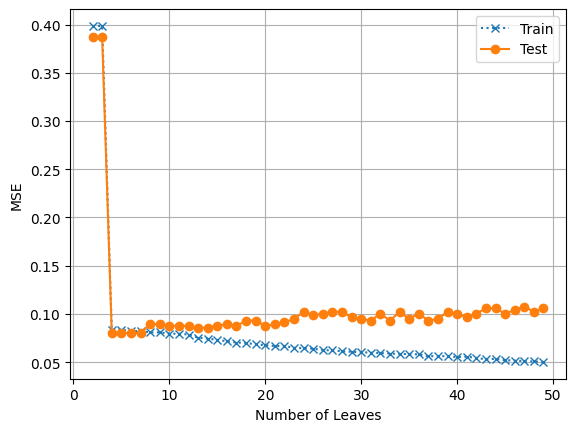

In [37]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.20, random_state=42)

errors = []

for max_leaves in range(2,50):
    # train and predict
    dt = DecisionTreeClassifier(max_leaf_nodes=max_leaves)
    dt.fit(X_train,y_train)

    # compute Accuracy
    train_acc = mean_squared_error(y_true=y_train, y_pred=dt.predict(X_train))
    test_acc  = mean_squared_error(y_true=y_test,  y_pred=dt.predict(X_test))

    errors += [ [max_leaves, train_acc, test_acc] ]

errors = np.array(errors)

fig, ax = plt.subplots()
ax.plot(errors[:,0], errors[:,1], "x:", label="Train")
ax.plot(errors[:,0], errors[:,2], "o-", label="Test")
ax.set_ylabel("MSE")
ax.set_xlabel("Number of Leaves")
ax.grid()
ax.legend();

Cross-validation

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Genera un dataset di esempio

# Loop per diversi valori di max_leaf_nodes
for max_leaves in range(2, 20):
    # Crea il classificatore
    dt = DecisionTreeClassifier(max_leaf_nodes=max_leaves, random_state=42)
    
    # Esegui la cross-validation (usa 5-fold per default)
    scores = cross_val_score(dt, train, y, cv=13, scoring='accuracy')
    
    # Calcola l'accuratezza media e la deviazione standard
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    
    print(f"Max leaves: {max_leaves} - CV Accuracy: {mean_score:.3f} ± {std_score:.3f}")


Max leaves: 2 - CV Accuracy: 0.692 ± 0.009
Max leaves: 3 - CV Accuracy: 0.692 ± 0.009
Max leaves: 4 - CV Accuracy: 0.917 ± 0.017
Max leaves: 5 - CV Accuracy: 0.917 ± 0.017
Max leaves: 6 - CV Accuracy: 0.916 ± 0.018
Max leaves: 7 - CV Accuracy: 0.915 ± 0.018
Max leaves: 8 - CV Accuracy: 0.915 ± 0.017
Max leaves: 9 - CV Accuracy: 0.915 ± 0.017
Max leaves: 10 - CV Accuracy: 0.913 ± 0.016
Max leaves: 11 - CV Accuracy: 0.912 ± 0.016
Max leaves: 12 - CV Accuracy: 0.910 ± 0.016
Max leaves: 13 - CV Accuracy: 0.910 ± 0.018
Max leaves: 14 - CV Accuracy: 0.909 ± 0.015
Max leaves: 15 - CV Accuracy: 0.909 ± 0.016
Max leaves: 16 - CV Accuracy: 0.908 ± 0.016
Max leaves: 17 - CV Accuracy: 0.908 ± 0.017
Max leaves: 18 - CV Accuracy: 0.907 ± 0.017
Max leaves: 19 - CV Accuracy: 0.908 ± 0.017
